## Problem Statement: 

With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make car price valuation model. This project contains two phase. 

### Model Building Phase
After collecting the data, you need to build a machine learning model. Before model building do all data pre-processing steps. Try different models with different hyper parameters and select the best model.Follow the complete life cycle of data science. Include all the steps like.

    1. Data Cleaning
    2. Exploratory Data Analysis
    3. Data Pre-processing
    4. Model Building
    5. Model Evaluation
    6. Selecting the best model

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

import sklearn 
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler 
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR 
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
df = pd.read_excel(r"C:\Users\sudes\Downloads\Used_CarDetails.xlsx")

In [3]:
df

,Unnamed: 0,Unnamed: 0.1,Model,Make_Year,Driven_Kilometers,Fuel,Transmission,Owner(s),Mileage,Engine,Price,Location
0,12,12,Maruti Wagon R,2017,41174,Petrol,Automatic,1,20.51,998,430000,Ahmedabad
1,14,14,Hyundai Verna CRDi . AT SX Plus,2017,70000,Diesel,Automatic,1,22.00,1582,894999,Ahmedabad
2,58,58,Audi A TDI Premium Plus,2018,14667,Diesel,Automatic,1,18.25,1968,3200000,Ahmedabad
3,62,62,Honda City i VTEC CVT VX,2016,55000,Petrol,Automatic,1,18.00,1497,877999,Ahmedabad
4,63,63,Mercedes-Benz E-Class Exclusive E d BSIV,2019,30486,Diesel,Automatic,1,16.10,1950,4800000,Ahmedabad
...,...,...,...,...,...,...,...,...,...,...,...,...
6219,6411,6449,Ford EcoSport . Diesel Titanium BSIV,2019,30000,Diesel,Manual,1,23.00,1498,990000,Pune
6220,6412,6450,Maruti Wagon R VXI Plus,2017,40000,Petrol,Manual,1,20.51,998,450000,Pune
6221,6419,6457,Toyota Yaris G BSIV,2018,23643,Petrol,Manual,1,17.10,1496,1000000,Pune
6222,6422,6460,Hyundai Verna . VTVT,2012,69000,Petrol,Manual,1,17.43,1396,465000,Pune


### Understanding the dataset now: 

In [4]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Model', 'Make_Year', 'Driven_Kilometers',
       'Fuel', 'Transmission', 'Owner(s)', 'Mileage', 'Engine', 'Price',
       'Location'],
      dtype='object')

We have in total 12 columns, among which "Price" is our target variable. Rest of the variables are independent in nature.

In [5]:
## Removing the irrelevent columns that doesn't have any sort of significance with the target variable. 
df = df.drop('Unnamed: 0',axis=1) 
df = df.drop('Unnamed: 0.1',axis=1) 

In [6]:
df

,Model,Make_Year,Driven_Kilometers,Fuel,Transmission,Owner(s),Mileage,Engine,Price,Location
0,Maruti Wagon R,2017,41174,Petrol,Automatic,1,20.51,998,430000,Ahmedabad
1,Hyundai Verna CRDi . AT SX Plus,2017,70000,Diesel,Automatic,1,22.00,1582,894999,Ahmedabad
2,Audi A TDI Premium Plus,2018,14667,Diesel,Automatic,1,18.25,1968,3200000,Ahmedabad
3,Honda City i VTEC CVT VX,2016,55000,Petrol,Automatic,1,18.00,1497,877999,Ahmedabad
4,Mercedes-Benz E-Class Exclusive E d BSIV,2019,30486,Diesel,Automatic,1,16.10,1950,4800000,Ahmedabad
...,...,...,...,...,...,...,...,...,...,...
6219,Ford EcoSport . Diesel Titanium BSIV,2019,30000,Diesel,Manual,1,23.00,1498,990000,Pune
6220,Maruti Wagon R VXI Plus,2017,40000,Petrol,Manual,1,20.51,998,450000,Pune
6221,Toyota Yaris G BSIV,2018,23643,Petrol,Manual,1,17.10,1496,1000000,Pune
6222,Hyundai Verna . VTVT,2012,69000,Petrol,Manual,1,17.43,1396,465000,Pune


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6224 entries, 0 to 6223
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Model              6224 non-null   object 
 1   Make_Year          6224 non-null   int64  
 2   Driven_Kilometers  6224 non-null   int64  
 3   Fuel               6224 non-null   object 
 4   Transmission       6224 non-null   object 
 5   Owner(s)           6224 non-null   int64  
 6   Mileage            6224 non-null   float64
 7   Engine             6224 non-null   int64  
 8   Price              6224 non-null   int64  
 9   Location           6224 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 486.4+ KB


    Data type are of three types avilable within the dataset: Float, Integer, and Object. 
    Target variable is of integer data type. 

In [8]:
df.isnull().sum()

Model                0
Make_Year            0
Driven_Kilometers    0
Fuel                 0
Transmission         0
Owner(s)             0
Mileage              0
Engine               0
Price                0
Location             0
dtype: int64

There are no null values avilable in the dataset. 

In [12]:
print("Model avilable: ", df.Model.unique())
print("Fuel used: ", df.Fuel.unique())
print("Transmission: ", df.Transmission.unique())
print("Location of used cars: ", df.Location.unique())

Model avilable:  [' Maruti Wagon R' 'Hyundai Verna CRDi . AT SX Plus'
 'Audi A  TDI Premium Plus' ... 'Maruti Wagon R CNG LXI BSIV'
 'Maruti Wagon R VXI Plus' 'Toyota Yaris G BSIV']
Fuel used:  ['Petrol' 'Diesel' 'CNG' 'LPG']
Transmission:  ['Automatic' 'Manual']
Location of used cars:  ['Ahmedabad' 'Bangalore' 'Chennai' 'NCR' 'Gurgaon' 'Hyderabad' 'Jaipur'
 'Kolkata' 'Mumbai' 'New Delhi' 'Noida' 'Pune']


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Make_Year,6224.0,2014.862789,3.056772,2000.0,2013.00,2015.00,2017.00,2021.0
Driven_Kilometers,6224.0,58242.295148,37702.893801,500.0,32119.25,55000.00,77072.25,886253.0
Owner(s),6224.0,1.214653,0.467354,1.0,1.00,1.00,1.00,4.0
Mileage,6224.0,19.957942,3.872215,7.5,17.40,20.14,22.54,36.0
Engine,6224.0,1405.529724,467.313843,624.0,1197.00,1248.00,1498.00,5000.0
Price,6224.0,703003.970437,763955.269484,45000.0,355000.00,500000.00,700000.00,9100000.0


Observation:

    1. In total, we got the 6224 data points with respect to each column. 
    2. The mean of the distribution is quite high, implying data is quite skewed. 
    3. There is a huge difference between the 50% values and maximum values available. 

### Performming EDA with visualisation now: 

<AxesSubplot:xlabel='Price', ylabel='Density'>

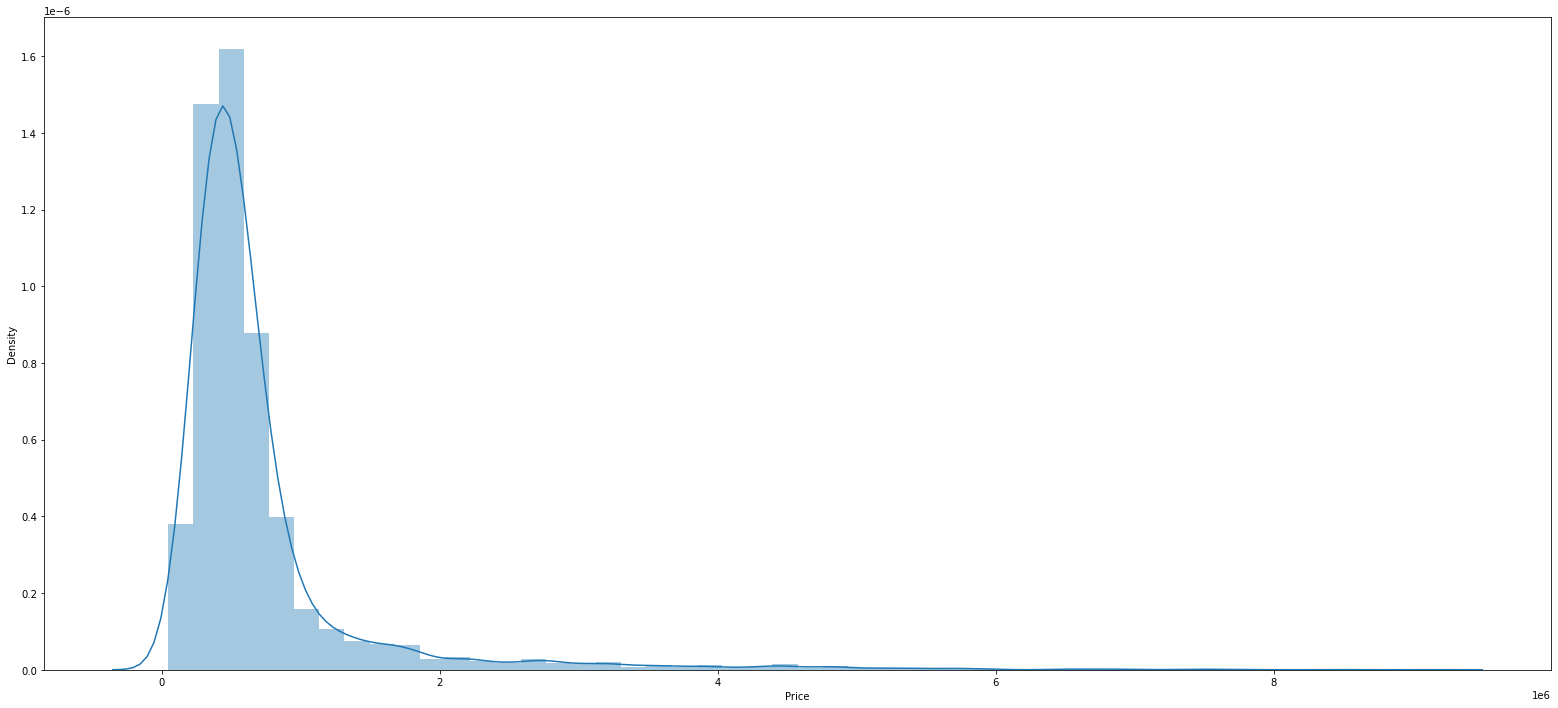

In [14]:
plt.figure(figsize=[27,12])
sns.distplot(df.Price)

Target variable is quitw rightly skewed. Distrbution is not normally distributed.

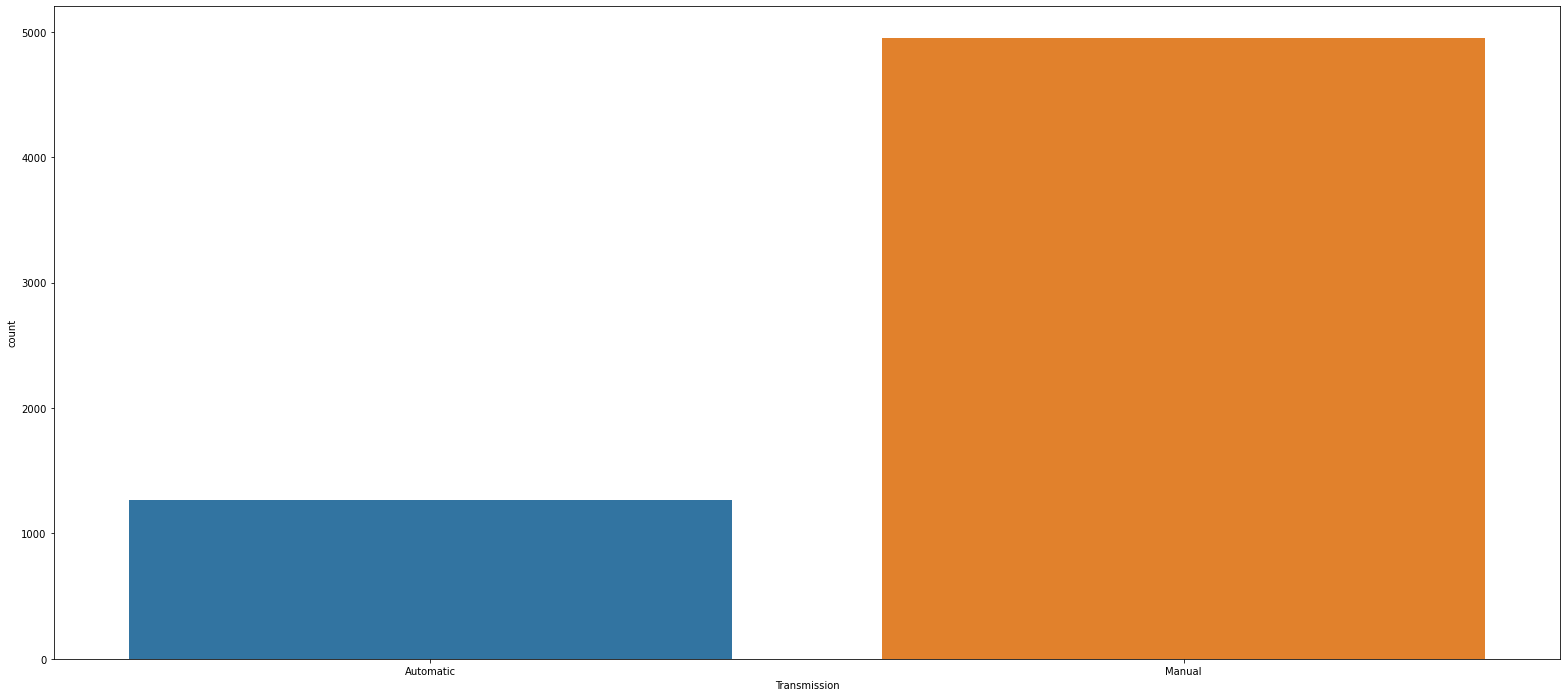

In [15]:
plt.figure(figsize=[27,12])
sns.countplot(x = 'Transmission', data = df)
plt.show()

Two types of trasmission is available, "Automatic" and "Manual". Majority of the used cars have the manual transmission. 

<AxesSubplot:xlabel='Fuel', ylabel='count'>

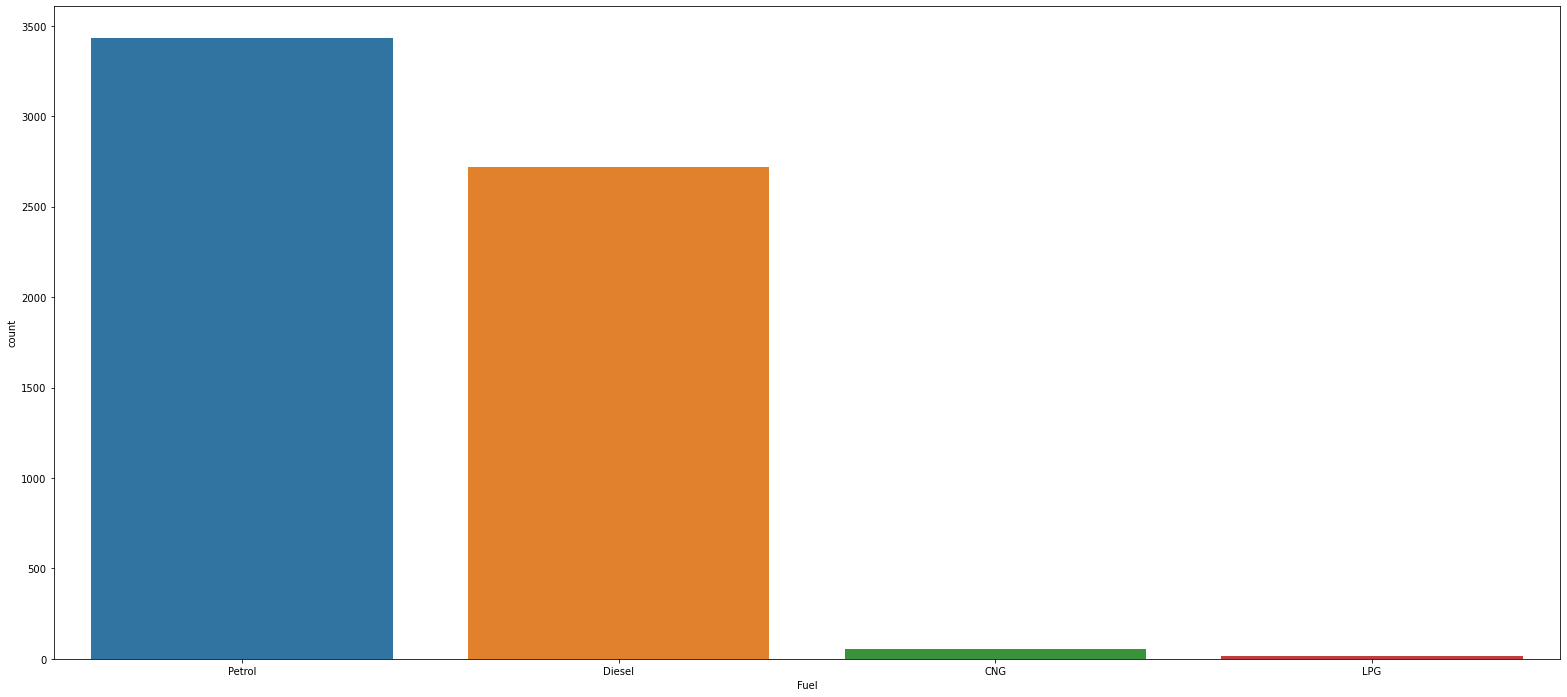

In [16]:
plt.figure(figsize=[27,12])
sns.countplot(x = 'Fuel', data = df)

Four type of fuel are used: Petrol, Disel, CNG, and LPG. Majority of the cars are with the Petrol fuel. Very rare cars are available with the LPG fuel type.

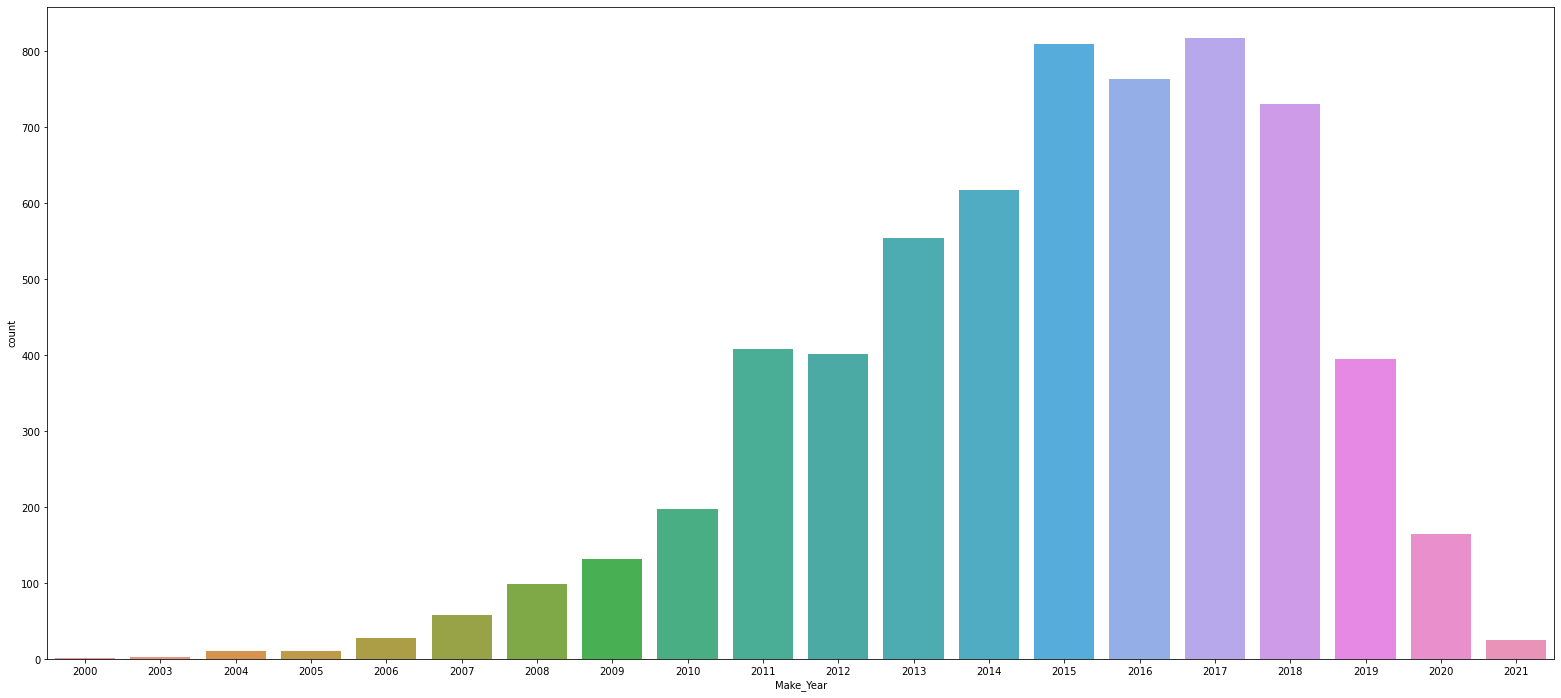

In [17]:
plt.figure(figsize=[27,12])
sns.countplot(x = 'Make_Year', data = df)
plt.show()

Majority of the cars from 2015, 2017, and 2018 are up for reselling purpose. 

<Figure size 1944x864 with 0 Axes>

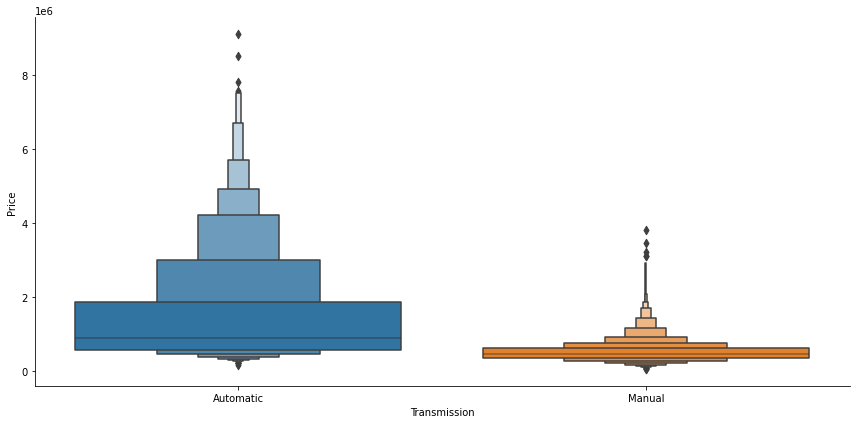

In [19]:
plt.figure(figsize=[27,12])
sns.catplot(y = 'Price', x = 'Transmission',data= df.sort_values("Price", ascending = False), 
            kind = "boxen", height = 6, aspect = 2)

plt.tight_layout
plt.show()

<Figure size 1944x864 with 0 Axes>

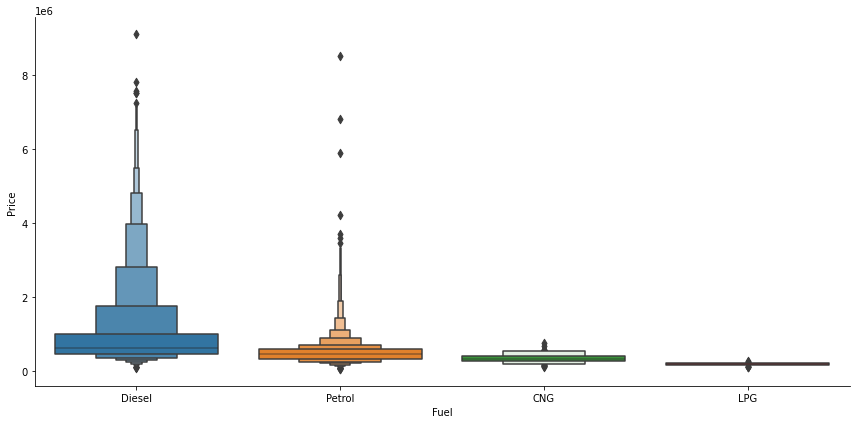

In [20]:
plt.figure(figsize=[27,12])
sns.catplot(y = 'Price', x = 'Fuel',data= df.sort_values("Price", ascending = False), 
            kind = "boxen", height = 6, aspect = 2)

plt.tight_layout
plt.show()

In [21]:
df.corr().T

,Make_Year,Driven_Kilometers,Owner(s),Mileage,Engine,Price
Make_Year,1.000000,-0.467516,-0.338092,0.258220,-0.102814,0.278047
Driven_Kilometers,-0.467516,1.000000,0.193648,-0.106689,0.268711,-0.100129
Owner(s),-0.338092,0.193648,1.000000,-0.159762,0.110342,-0.064697
Mileage,0.258220,-0.106689,-0.159762,1.000000,-0.582179,-0.335218
Engine,-0.102814,0.268711,0.110342,-0.582179,1.000000,0.638122
Price,0.278047,-0.100129,-0.064697,-0.335218,0.638122,1.000000


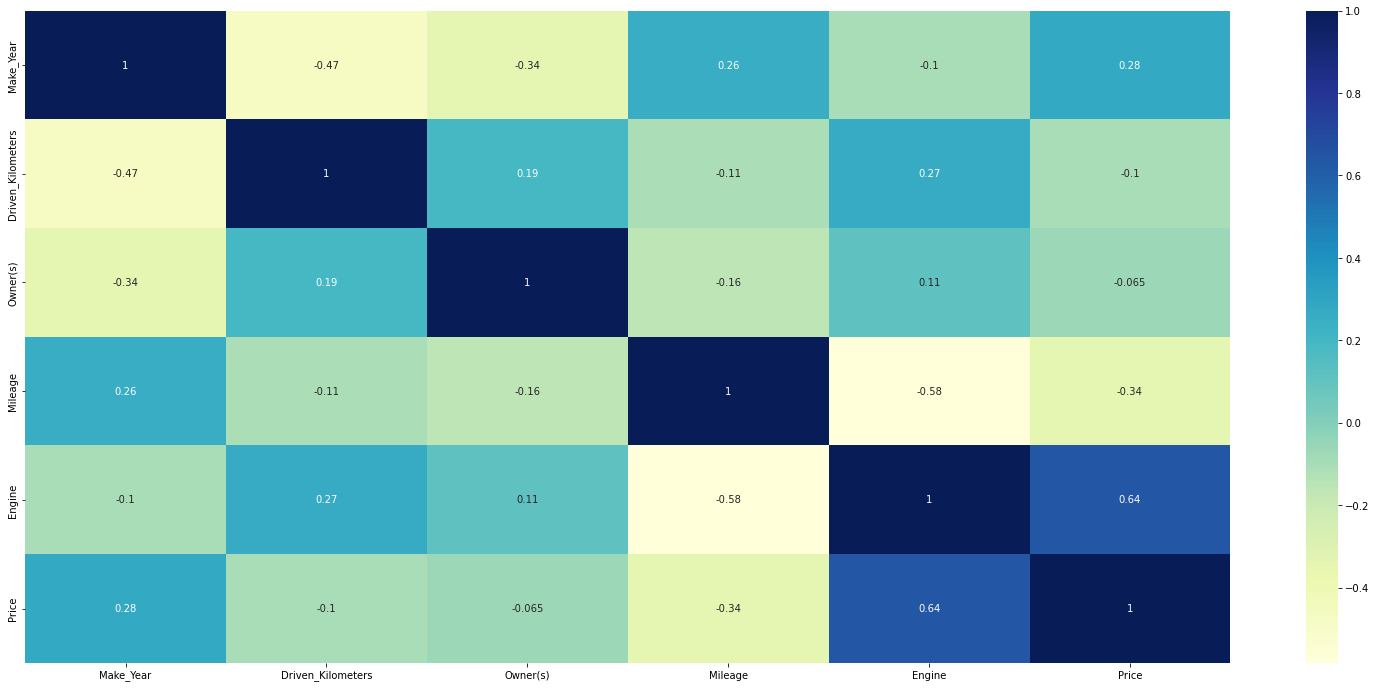

In [22]:
plt.figure(figsize=[27,12])
sns.heatmap(df.corr(),cmap='YlGnBu',annot = True)
plt.show()

Observation: 
    
    1. There is no such variable that holds high significance or correlation with the target variable. 
    2. Almost all the variable holds marginalised slight correlation with the target variable. 

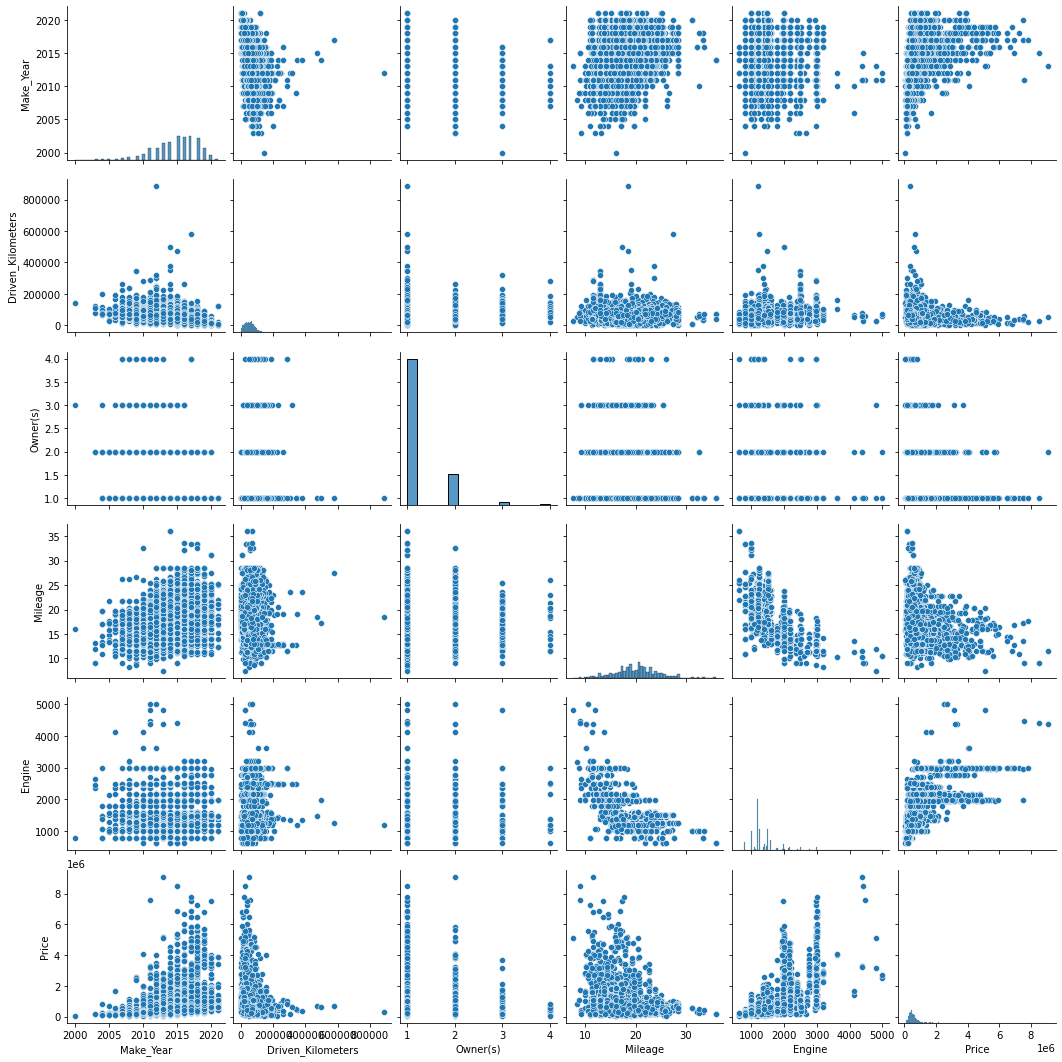

In [23]:
sns.pairplot(df)

<Figure size 432x288 with 0 Axes>

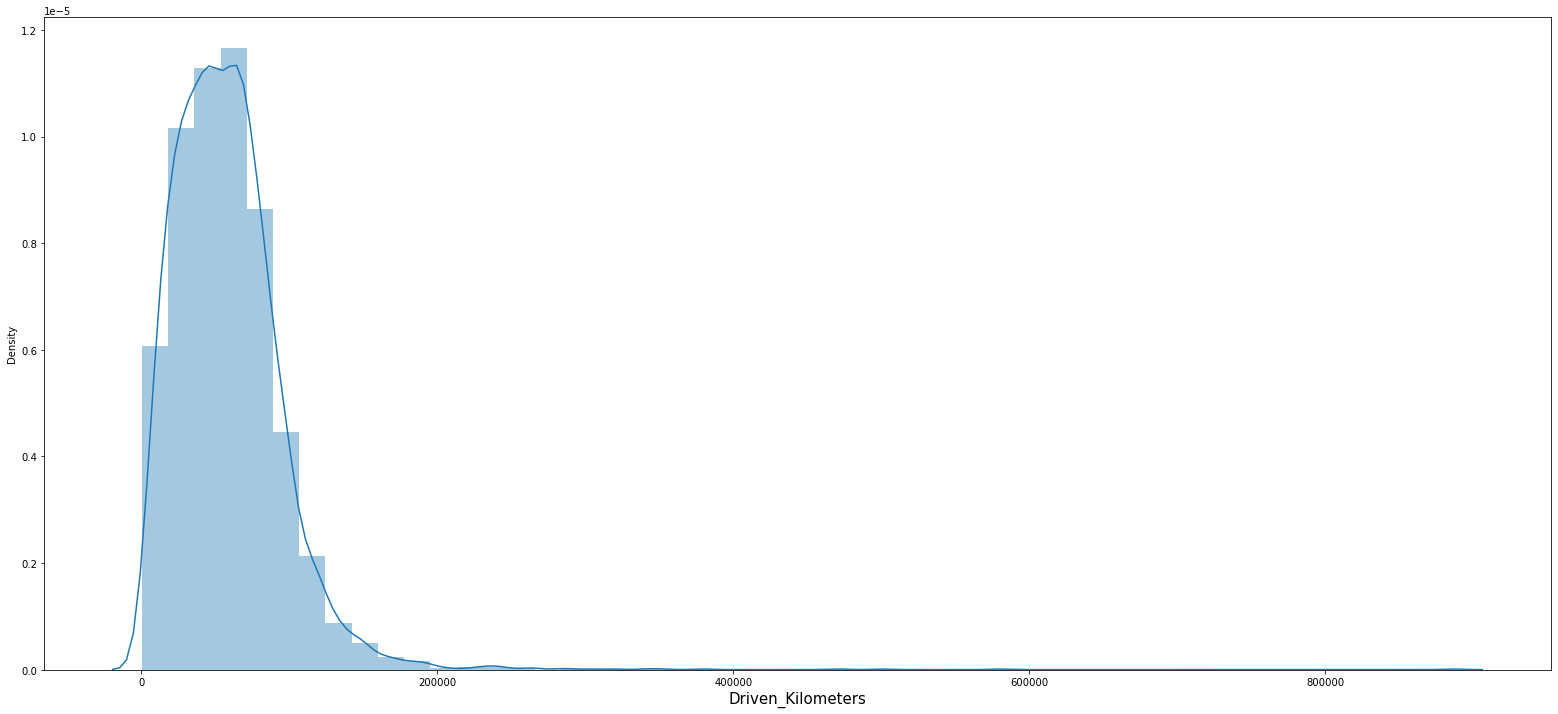

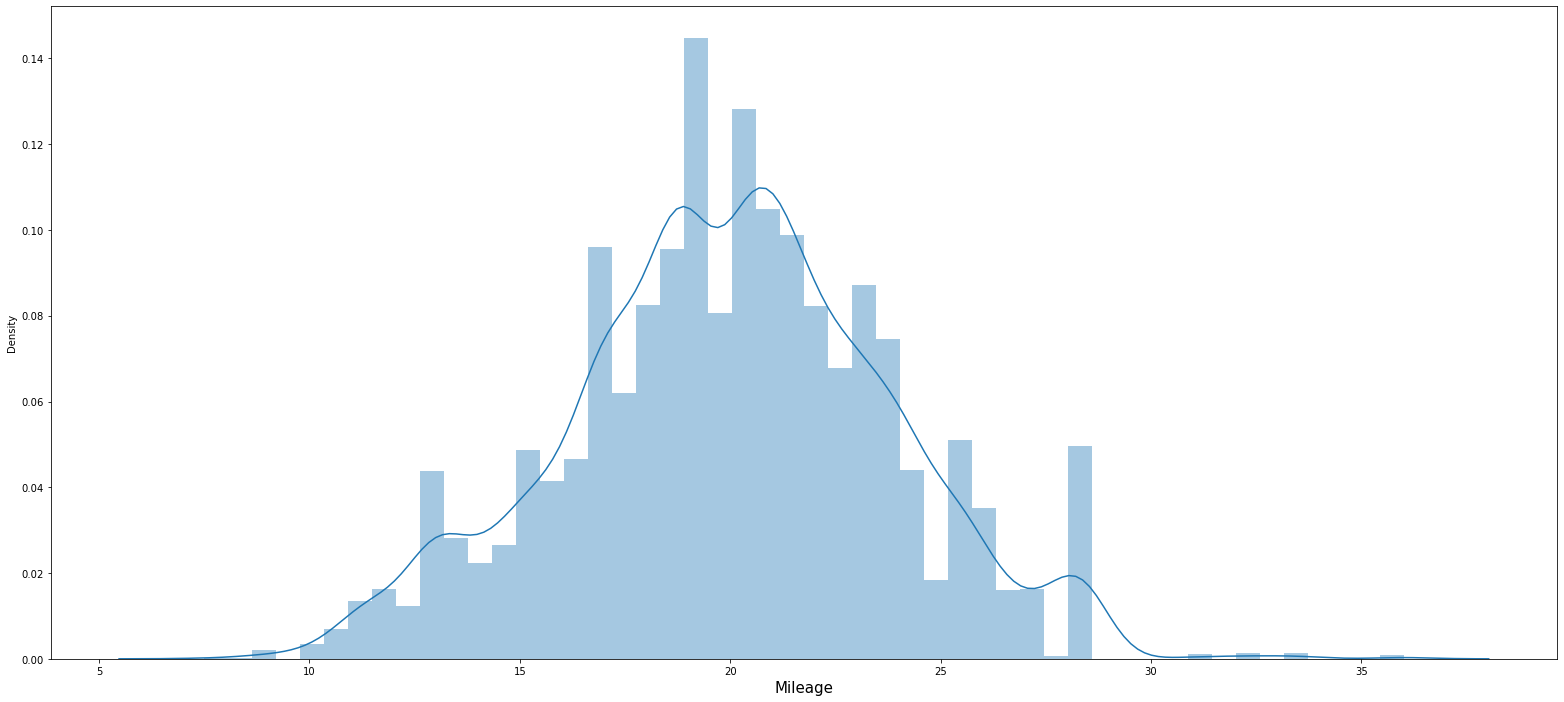

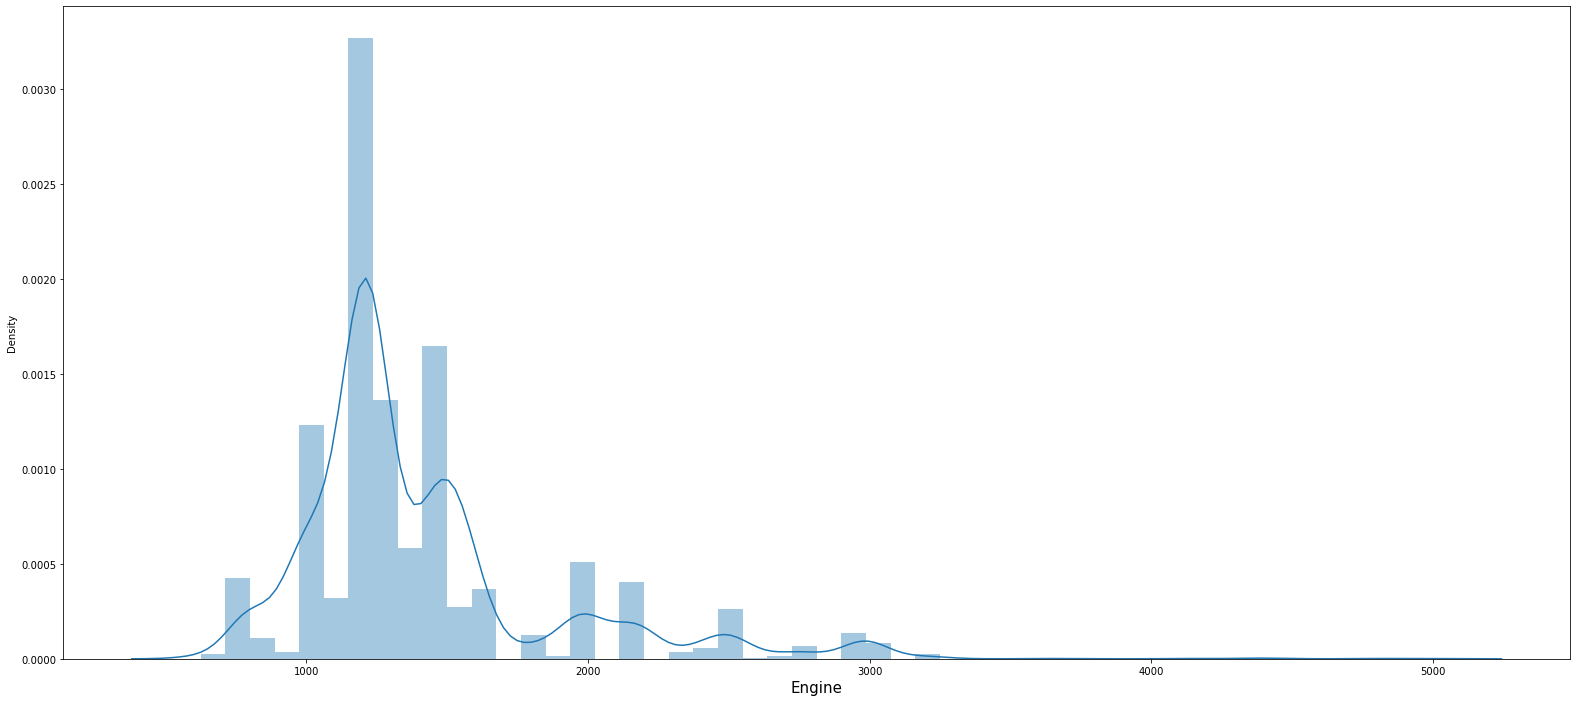

In [26]:
columns = ['Driven_Kilometers', 'Mileage', 'Engine'] #with numerical data

plt.tight_layout()
for i in columns:
    plt.figure(figsize=[27,12])
    sns.distplot(df[i])
    plt.xlabel(i,fontsize=15)
plt.show()


<Figure size 432x288 with 0 Axes>

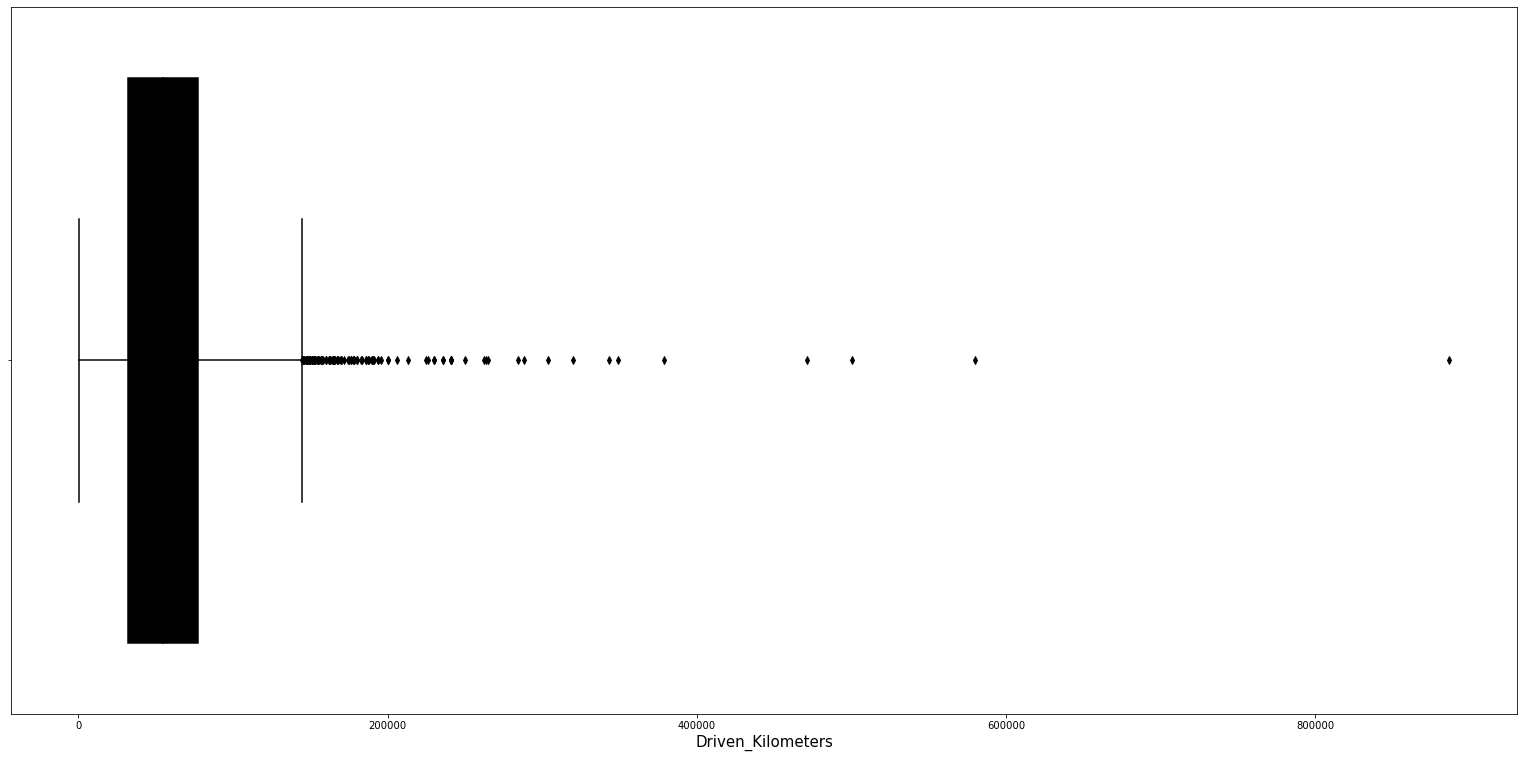

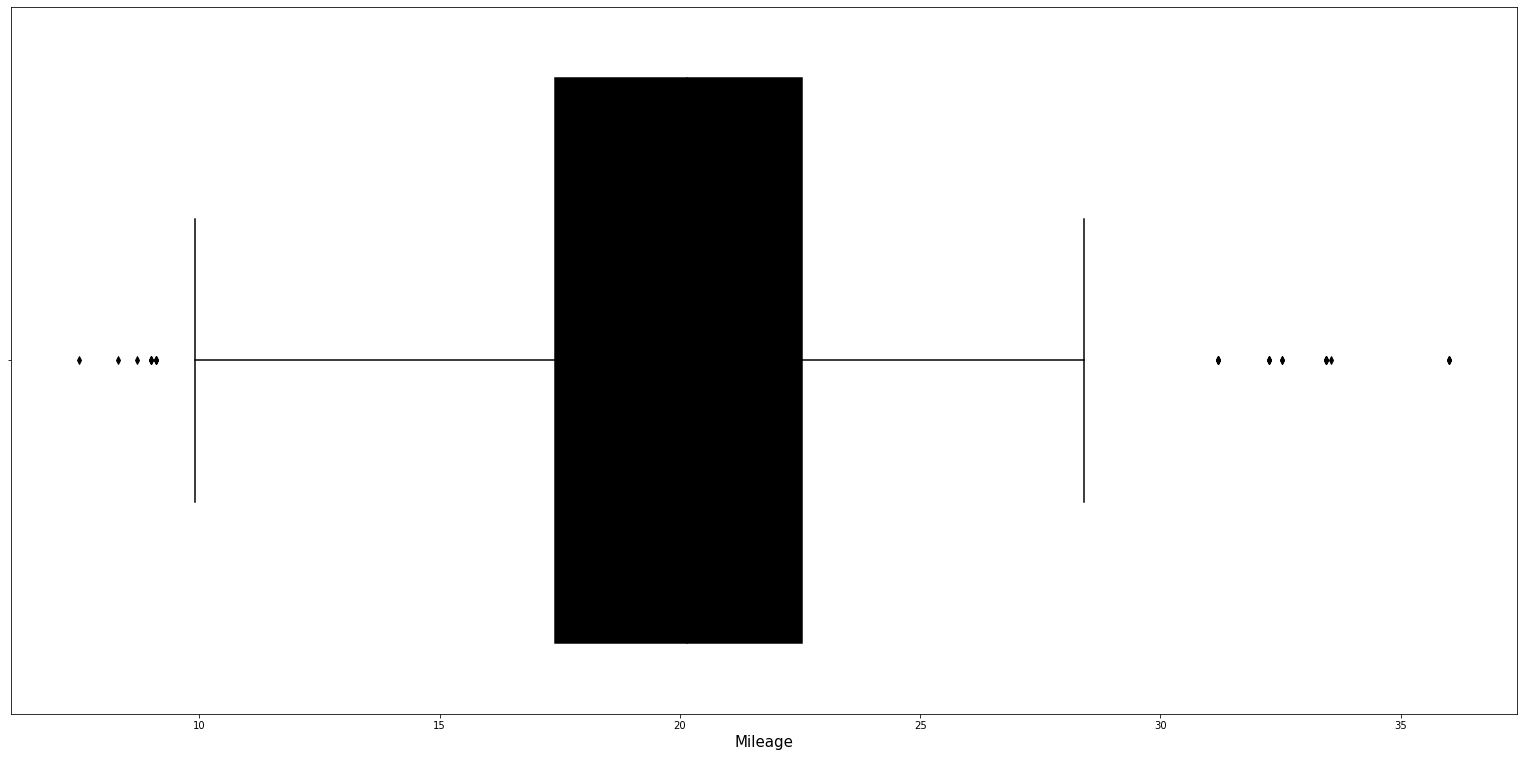

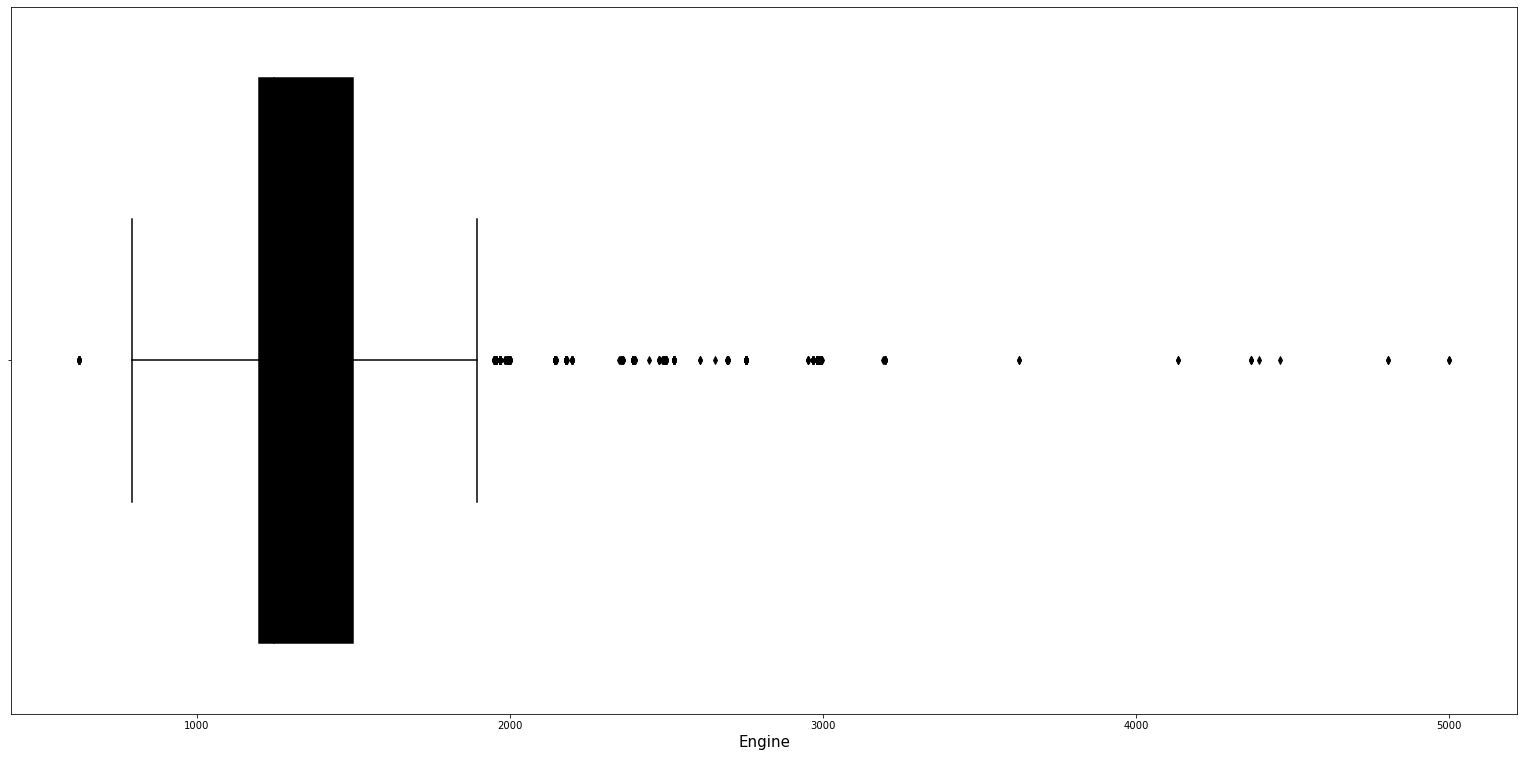

In [27]:
columns = ['Driven_Kilometers', 'Mileage', 'Engine']

plt.tight_layout()
for i in columns:
    plt.figure(figsize=[27,13])
    sns.boxplot(df[i],color = 'Black')
    plt.xlabel(i,fontsize=15)
plt.show()

Observation: 
Within these three variables, skewness and outliers both exsist - Due to this data is not following the normal distribution.

### Preprocessing the data now: 

In [28]:
### Removing the outliers now.
features = ['Driven_Kilometers', 'Mileage', 'Engine']
Q1 = df[features].quantile(0.25)
Q3 = df[features].quantile(0.75)
IQR = Q3-Q1

dfnew = df[~((df[features] < (Q1-1.5*IQR)) | (df[features]> (Q3 + 1.5*Q3))).any(axis = 1)]

In [29]:
### Applying zscore.
from scipy.stats import zscore  #importing zscore from library
z=np.abs(zscore(df[features]))
threshold = 3
dfnew1 = df[(z<3).all(axis=1)]

In [30]:
df.skew()

Make_Year           -0.611178
Driven_Kilometers    3.696483
Owner(s)             2.253673
Mileage              0.003963
Engine               2.017822
Price                4.320026
dtype: float64

In [31]:
dfnew.skew()

Make_Year           -0.611907
Driven_Kilometers    0.701490
Owner(s)             2.244314
Mileage              0.012334
Engine               1.738002
Price                4.160594
dtype: float64

In [32]:
dfnew['Driven_Kilometers'] = np.sqrt(dfnew['Driven_Kilometers'])

dfnew['Engine'] = np.log(dfnew['Engine'])
dfnew['Engine'] = np.cbrt(dfnew['Engine'])
dfnew['Engine'] = np.sqrt(dfnew['Engine'])

Make_Year           -0.611907
Driven_Kilometers   -0.130465
Owner(s)             2.244314
Mileage              0.012334
Engine               0.746089
Price                4.160594
dtype: float64


<AxesSubplot:ylabel='Density'>

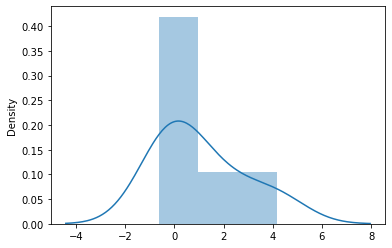

In [33]:
print(dfnew.skew())
sns.distplot(dfnew.skew())

In [35]:
# Create a dataframe that will contain the Brands (by extracting the name from the title of the model column)

df1 = {}
df1 = pd.DataFrame(dfnew['Model'].str.split().tolist(), columns="Brand Models A B C D E F G H".split())
df1 = df1.drop(columns=['Models','A','B','C','D','E','F','G','H'],axis=1)


df1['Index'] = range(6160) #creating an index column


df1.set_index('Index',inplace=True)
df1

,Brand
Index,
0,Maruti
1,Hyundai
2,Audi
3,Honda
4,Mercedes-Benz
...,...
6155,Ford
6156,Maruti
6157,Toyota


In [36]:
dfnew['Index'] = range(6160)
dfnew.set_index('Index',inplace=True) #assigning the index
dfnew

,Model,Make_Year,Driven_Kilometers,Fuel,Transmission,Owner(s),Mileage,Engine,Price,Location
Index,,,,,,,,,,
0,Maruti Wagon R,2017,202.913775,Petrol,Automatic,1,20.51,1.379966,430000,Ahmedabad
1,Hyundai Verna CRDi . AT SX Plus,2017,264.575131,Diesel,Automatic,1,22.00,1.394900,894999,Ahmedabad
2,Audi A TDI Premium Plus,2018,121.107390,Diesel,Automatic,1,18.25,1.401707,3200000,Ahmedabad
3,Honda City i VTEC CVT VX,2016,234.520788,Petrol,Automatic,1,18.00,1.393151,877999,Ahmedabad
4,Mercedes-Benz E-Class Exclusive E d BSIV,2019,174.602405,Diesel,Automatic,1,16.10,1.401423,4800000,Ahmedabad
...,...,...,...,...,...,...,...,...,...,...
6155,Ford EcoSport . Diesel Titanium BSIV,2019,173.205081,Diesel,Manual,1,23.00,1.393173,990000,Pune
6156,Maruti Wagon R VXI Plus,2017,200.000000,Petrol,Manual,1,20.51,1.379966,450000,Pune
6157,Toyota Yaris G BSIV,2018,153.762804,Petrol,Manual,1,17.10,1.393130,1000000,Pune


In [37]:
## Combining both the datasets now. 
Used_Cars = pd.concat([dfnew, df1], axis=1)

In [38]:
Used_Cars

,Model,Make_Year,Driven_Kilometers,Fuel,Transmission,Owner(s),Mileage,Engine,Price,Location,Brand
Index,,,,,,,,,,,
0,Maruti Wagon R,2017,202.913775,Petrol,Automatic,1,20.51,1.379966,430000,Ahmedabad,Maruti
1,Hyundai Verna CRDi . AT SX Plus,2017,264.575131,Diesel,Automatic,1,22.00,1.394900,894999,Ahmedabad,Hyundai
2,Audi A TDI Premium Plus,2018,121.107390,Diesel,Automatic,1,18.25,1.401707,3200000,Ahmedabad,Audi
3,Honda City i VTEC CVT VX,2016,234.520788,Petrol,Automatic,1,18.00,1.393151,877999,Ahmedabad,Honda
4,Mercedes-Benz E-Class Exclusive E d BSIV,2019,174.602405,Diesel,Automatic,1,16.10,1.401423,4800000,Ahmedabad,Mercedes-Benz
...,...,...,...,...,...,...,...,...,...,...,...
6155,Ford EcoSport . Diesel Titanium BSIV,2019,173.205081,Diesel,Manual,1,23.00,1.393173,990000,Pune,Ford
6156,Maruti Wagon R VXI Plus,2017,200.000000,Petrol,Manual,1,20.51,1.379966,450000,Pune,Maruti
6157,Toyota Yaris G BSIV,2018,153.762804,Petrol,Manual,1,17.10,1.393130,1000000,Pune,Toyota


In [39]:
Used_Cars.reset_index('Index',inplace=True) #reset the index
Used_Cars = Used_Cars.drop('Index',axis=1) #remove the extra columns
Used_Cars = Used_Cars.drop('Model',axis=1)

In [40]:
Used_Cars

,Make_Year,Driven_Kilometers,Fuel,Transmission,Owner(s),Mileage,Engine,Price,Location,Brand
0,2017,202.913775,Petrol,Automatic,1,20.51,1.379966,430000,Ahmedabad,Maruti
1,2017,264.575131,Diesel,Automatic,1,22.00,1.394900,894999,Ahmedabad,Hyundai
2,2018,121.107390,Diesel,Automatic,1,18.25,1.401707,3200000,Ahmedabad,Audi
3,2016,234.520788,Petrol,Automatic,1,18.00,1.393151,877999,Ahmedabad,Honda
4,2019,174.602405,Diesel,Automatic,1,16.10,1.401423,4800000,Ahmedabad,Mercedes-Benz
...,...,...,...,...,...,...,...,...,...,...
6155,2019,173.205081,Diesel,Manual,1,23.00,1.393173,990000,Pune,Ford
6156,2017,200.000000,Petrol,Manual,1,20.51,1.379966,450000,Pune,Maruti
6157,2018,153.762804,Petrol,Manual,1,17.10,1.393130,1000000,Pune,Toyota
6158,2012,262.678511,Petrol,Manual,1,17.43,1.390924,465000,Pune,Hyundai


['Maruti' 'Hyundai' 'Audi' 'Honda' 'Mercedes-Benz' 'Kia' 'Skoda' 'Toyota'
 'Ford' 'Nissan' 'Jaguar' 'BMW' 'Mini' 'Volvo' 'Mahindra' 'Volkswagen'
 'Renault' 'Land' 'Tata' 'MG' 'Porsche' 'Mitsubishi' 'Chevrolet' 'New'
 'Jeep' 'Datsun' 'Force' 'Fiat' 'OpelCorsa']


<AxesSubplot:ylabel='count'>

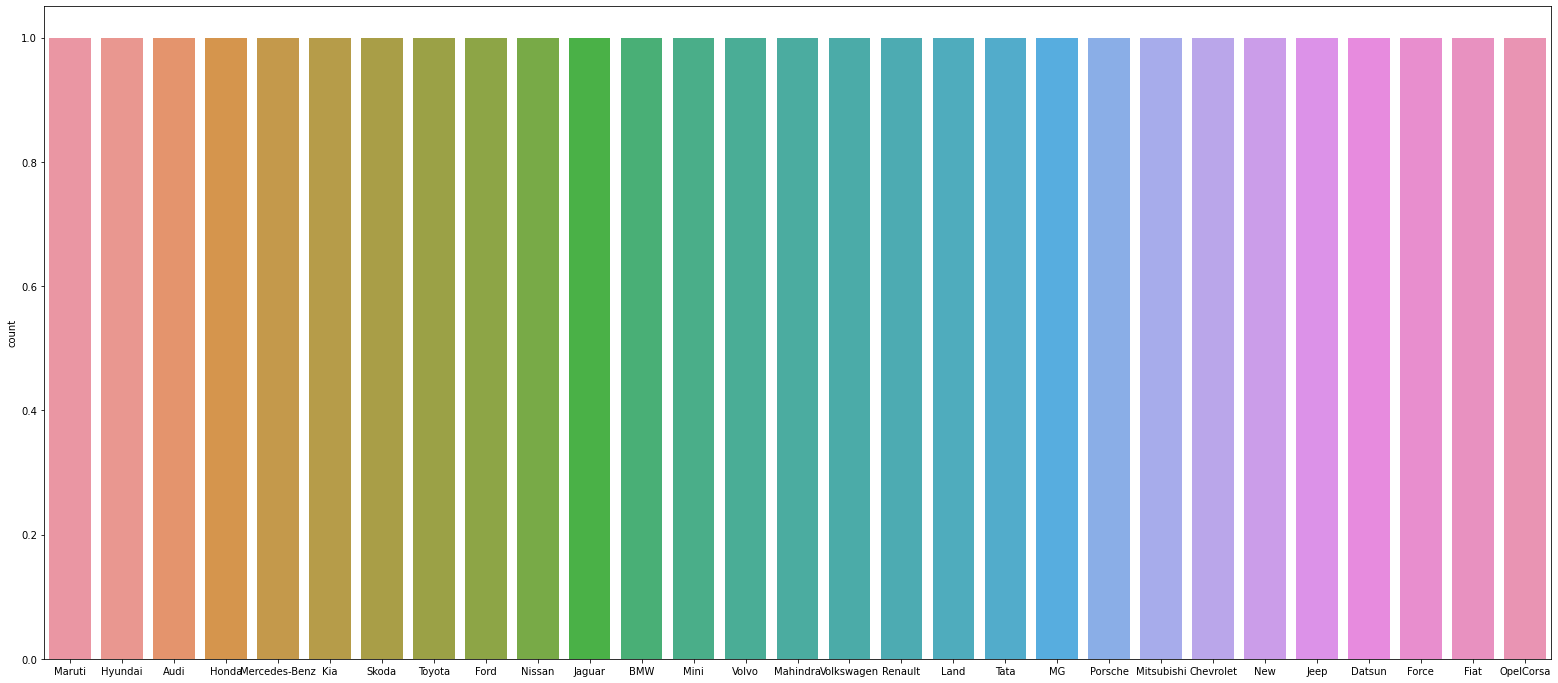

In [42]:
print(Used_Cars['Brand'].unique())
plt.figure(figsize=[27,12])
sns.countplot(Used_Cars['Brand'].unique())

In [43]:
### Encoding the variables now. 
l1 = ['Transmission','Fuel','Make_Year'] 
le = LabelEncoder()  

for i in l1:
    Used_Cars[i]= le.fit_transform(Used_Cars[i].values.reshape(-1,1))
Used_Cars.head()

,Make_Year,Driven_Kilometers,Fuel,Transmission,Owner(s),Mileage,Engine,Price,Location,Brand
0,15,202.913775,3,0,1,20.51,1.379966,430000,Ahmedabad,Maruti
1,15,264.575131,1,0,1,22.00,1.394900,894999,Ahmedabad,Hyundai
2,16,121.107390,1,0,1,18.25,1.401707,3200000,Ahmedabad,Audi
3,14,234.520788,3,0,1,18.00,1.393151,877999,Ahmedabad,Honda
4,17,174.602405,1,0,1,16.10,1.401423,4800000,Ahmedabad,Mercedes-Benz


In [44]:
#Get dummies
l2=pd.get_dummies(Used_Cars['Brand'])
Used_Cars=pd.concat([Used_Cars.drop('Brand',axis=1),l2],axis=1)

In [45]:
#Get dummies
l3=pd.get_dummies(Used_Cars['Location'])
Used_Cars=pd.concat([Used_Cars.drop('Location',axis=1),l3],axis=1)

In [46]:
Used_Cars

,Make_Year,Driven_Kilometers,Fuel,Transmission,Owner(s),Mileage,Engine,Price,Audi,BMW,...,Chennai,Gurgaon,Hyderabad,Jaipur,Kolkata,Mumbai,NCR,New Delhi,Noida,Pune
0,15,202.913775,3,0,1,20.51,1.379966,430000,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15,264.575131,1,0,1,22.00,1.394900,894999,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16,121.107390,1,0,1,18.25,1.401707,3200000,1,0,...,0,0,0,0,0,0,0,0,0,0
3,14,234.520788,3,0,1,18.00,1.393151,877999,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,174.602405,1,0,1,16.10,1.401423,4800000,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6155,17,173.205081,1,1,1,23.00,1.393173,990000,0,0,...,0,0,0,0,0,0,0,0,0,1
6156,15,200.000000,3,1,1,20.51,1.379966,450000,0,0,...,0,0,0,0,0,0,0,0,0,1
6157,16,153.762804,3,1,1,17.10,1.393130,1000000,0,0,...,0,0,0,0,0,0,0,0,0,1
6158,10,262.678511,3,1,1,17.43,1.390924,465000,0,0,...,0,0,0,0,0,0,0,0,0,1


### Splitting the variables now.

In [47]:
X = Used_Cars.drop(columns = 'Price') #Features
Y = Used_Cars['Price'] #Label
print('Features dimension:\t',X.shape,'\nLabel Dimension:\t',Y.shape)

Features dimension:	 (6160, 48) 
Label Dimension:	 (6160,)


In [48]:
## Performing the standard scaling the variable. 
Scaler = StandardScaler()
X_scaled = Scaler.fit_transform(X)

### Splitting the training and testing data now: 

In [49]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled, Y, test_size =0.20, random_state = 148)

### Building the model now: 

LinearRegression()
R Squared (R2):  78.53333242813297
Mean Squared Error (MSE):  119977028961.1841
Root Mean Squared Error (RMSE):  346377.00408829696
Mean Absolute Error (MAE):  183956.36942656068


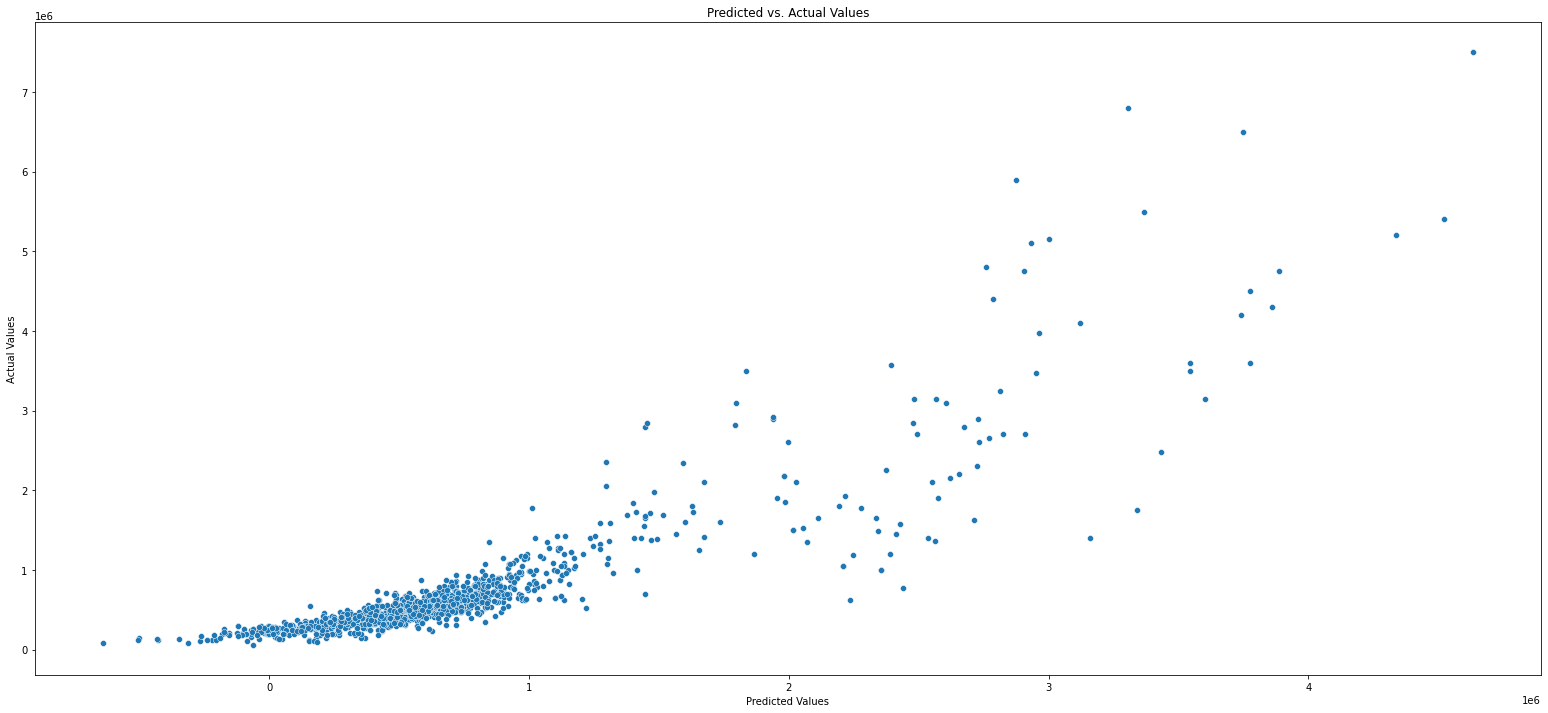

------------------------------------------------------------------------------------------------------------------------
RandomForestRegressor()
R Squared (R2):  90.75764417915568
Mean Squared Error (MSE):  51655450864.6805
Root Mean Squared Error (RMSE):  227278.35546897224
Mean Absolute Error (MAE):  82537.60162829506


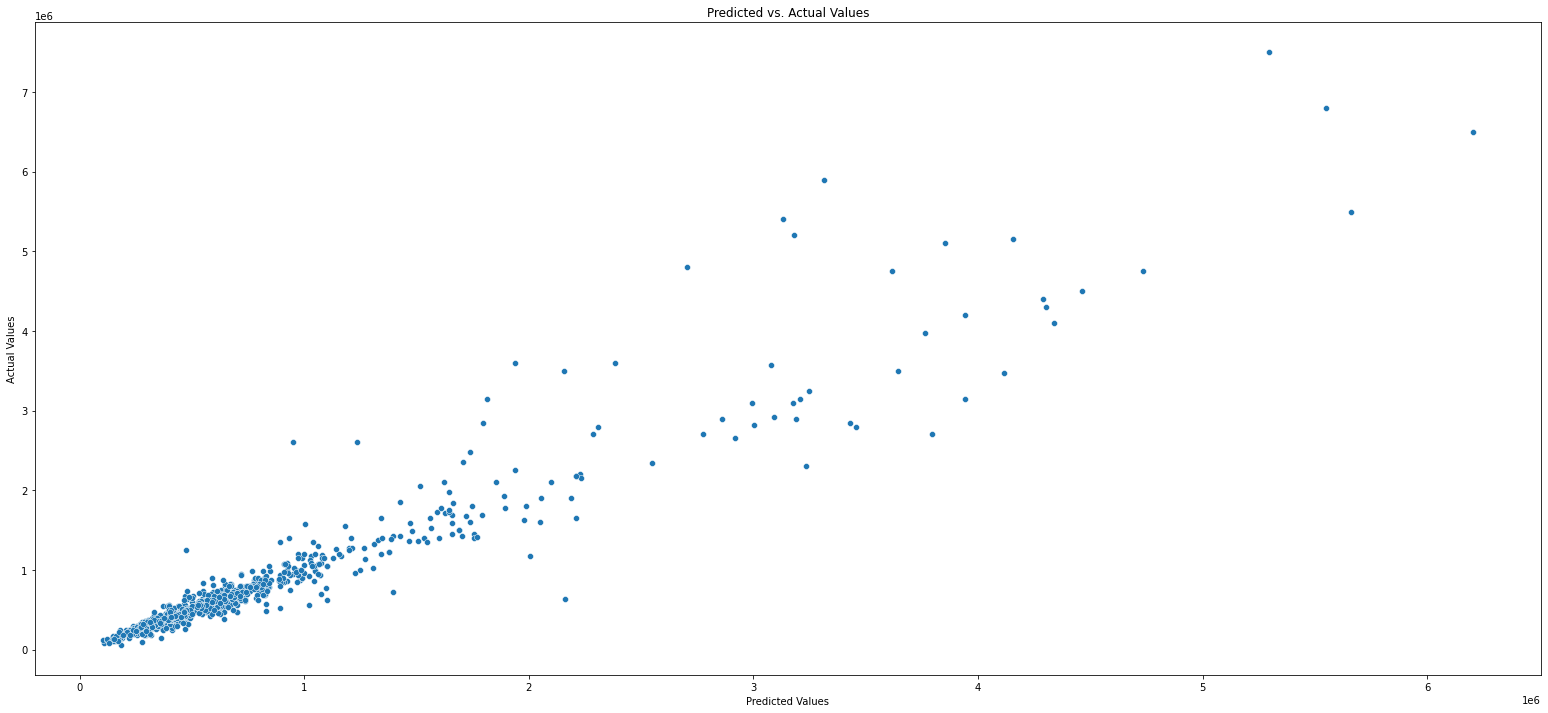

------------------------------------------------------------------------------------------------------------------------
KNeighborsRegressor()
R Squared (R2):  77.65927328483575
Mean Squared Error (MSE):  124862138342.8838
Root Mean Squared Error (RMSE):  353358.37098176096
Mean Absolute Error (MAE):  152632.70892857143


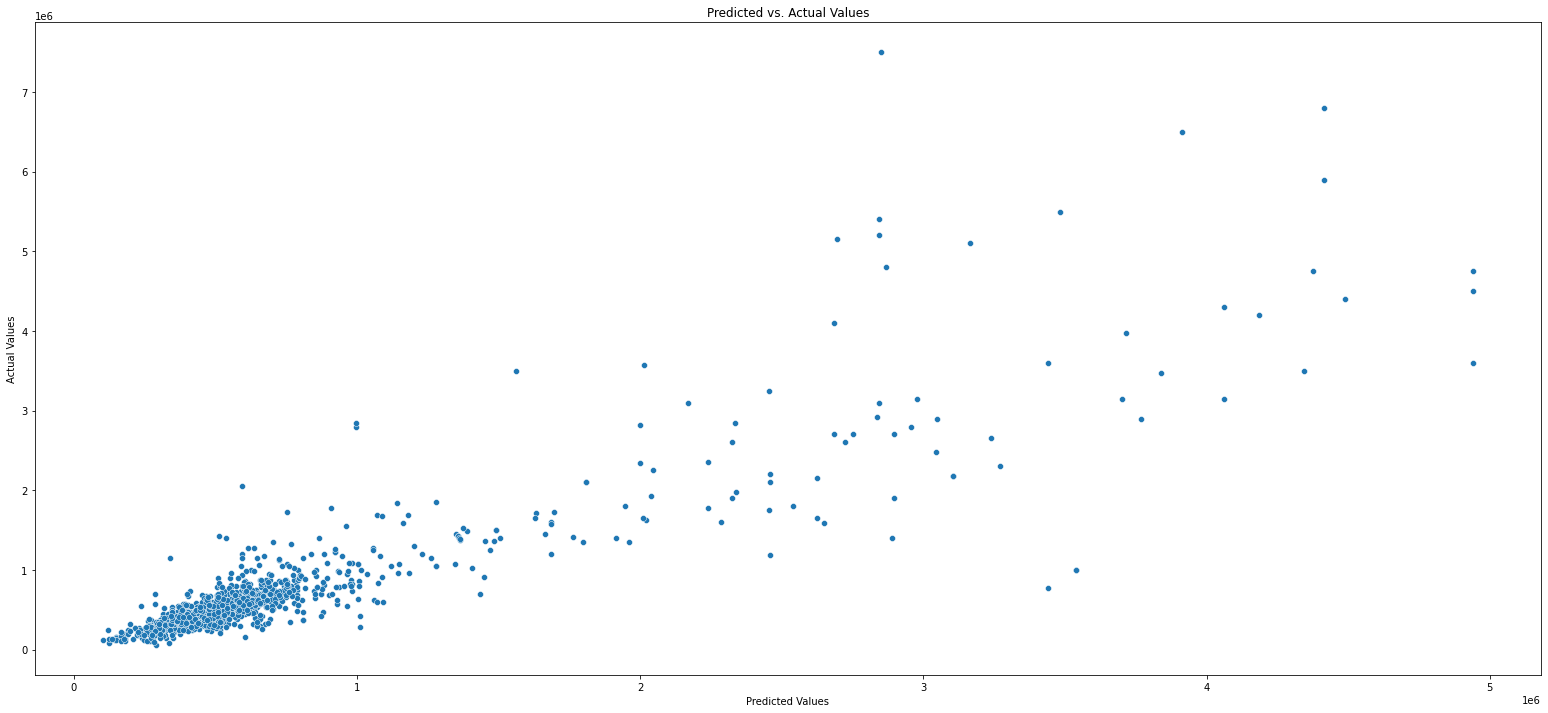

------------------------------------------------------------------------------------------------------------------------
GradientBoostingRegressor()
R Squared (R2):  90.62527178140883
Mean Squared Error (MSE):  52395279109.794304
Root Mean Squared Error (RMSE):  228900.1509606193
Mean Absolute Error (MAE):  115024.56670550001


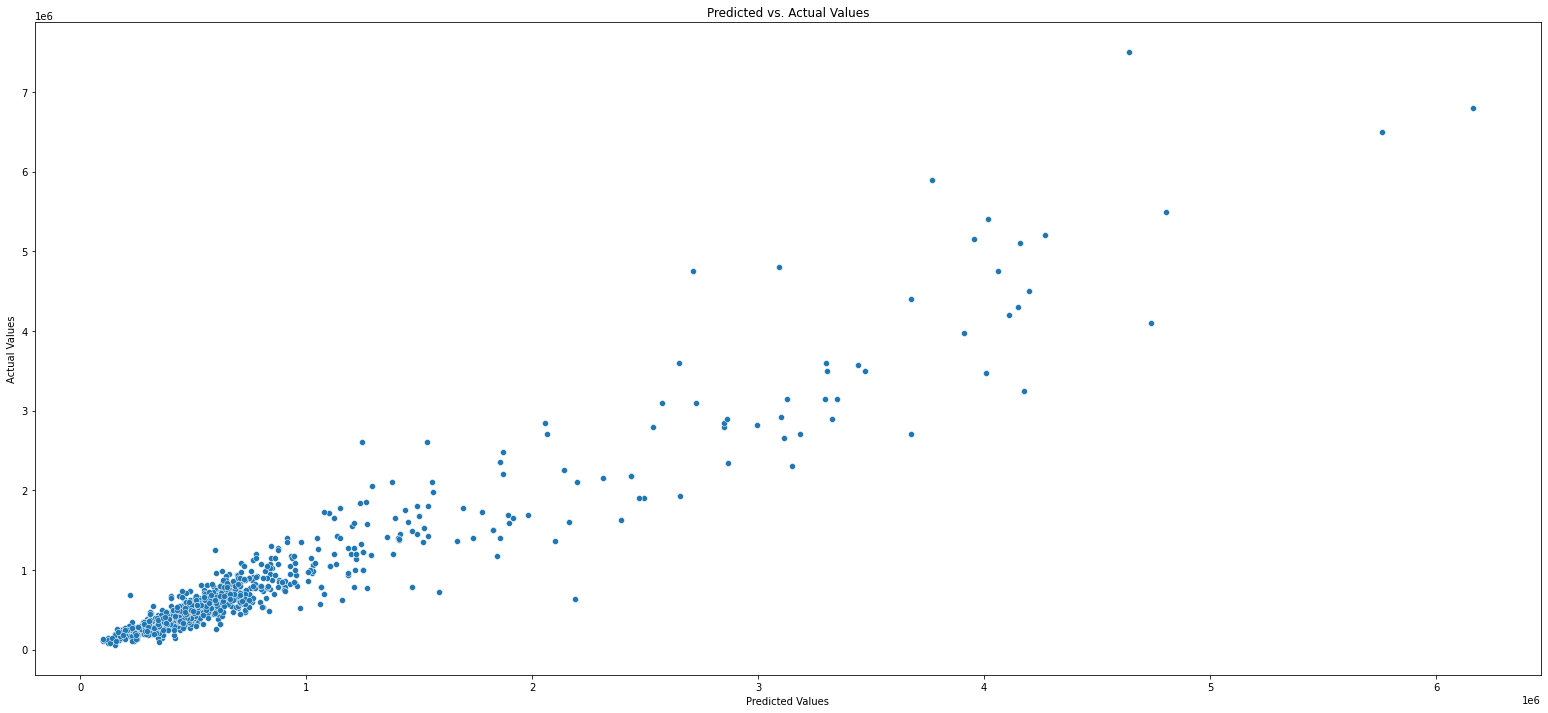

------------------------------------------------------------------------------------------------------------------------
DecisionTreeRegressor(max_features='auto')
R Squared (R2):  86.18459157874436
Mean Squared Error (MSE):  77214204334.15747
Root Mean Squared Error (RMSE):  277874.4398719635
Mean Absolute Error (MAE):  98446.9448051948


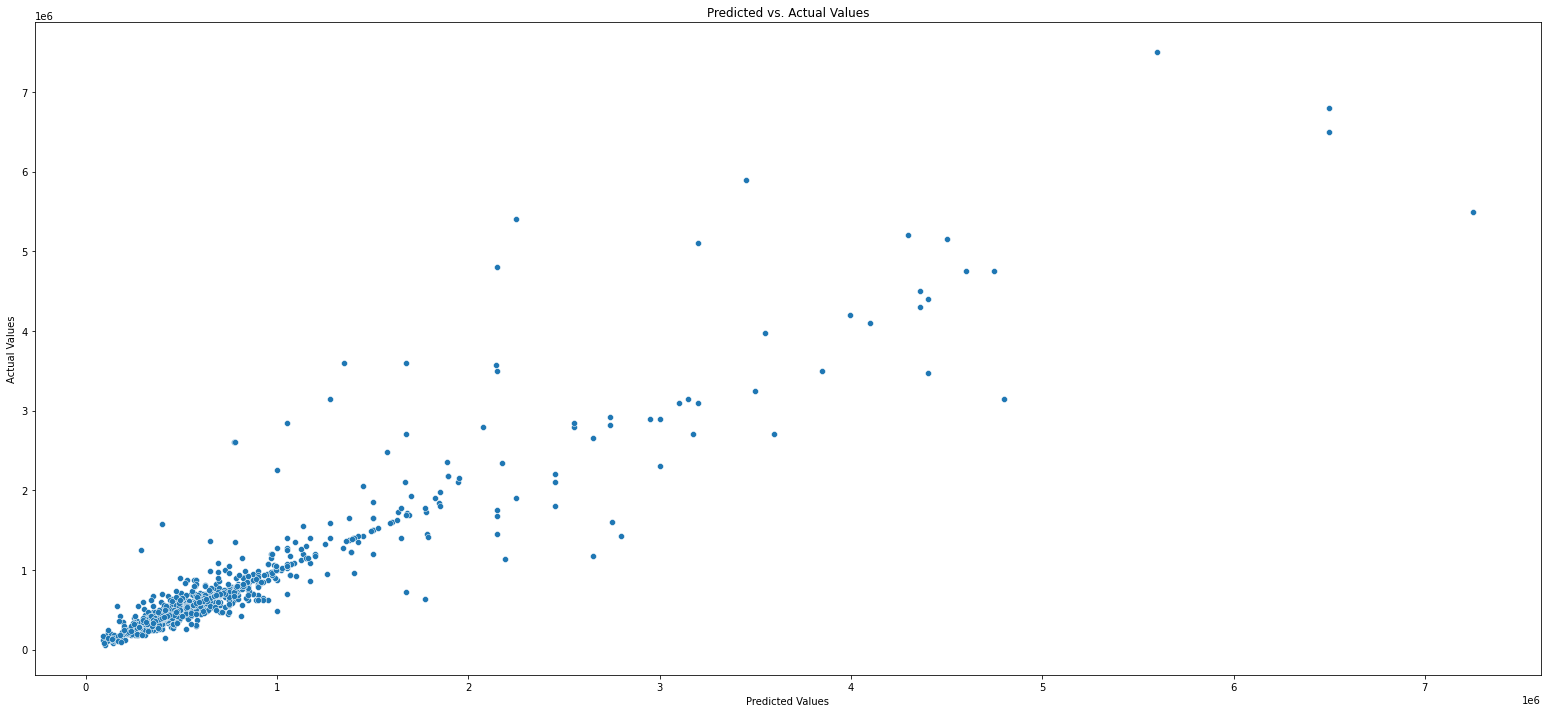

------------------------------------------------------------------------------------------------------------------------
Lasso()
R Squared (R2):  78.53383251107547
Mean Squared Error (MSE):  119974234001.72075
Root Mean Squared Error (RMSE):  346372.96950212604
Mean Absolute Error (MAE):  183979.7163302099


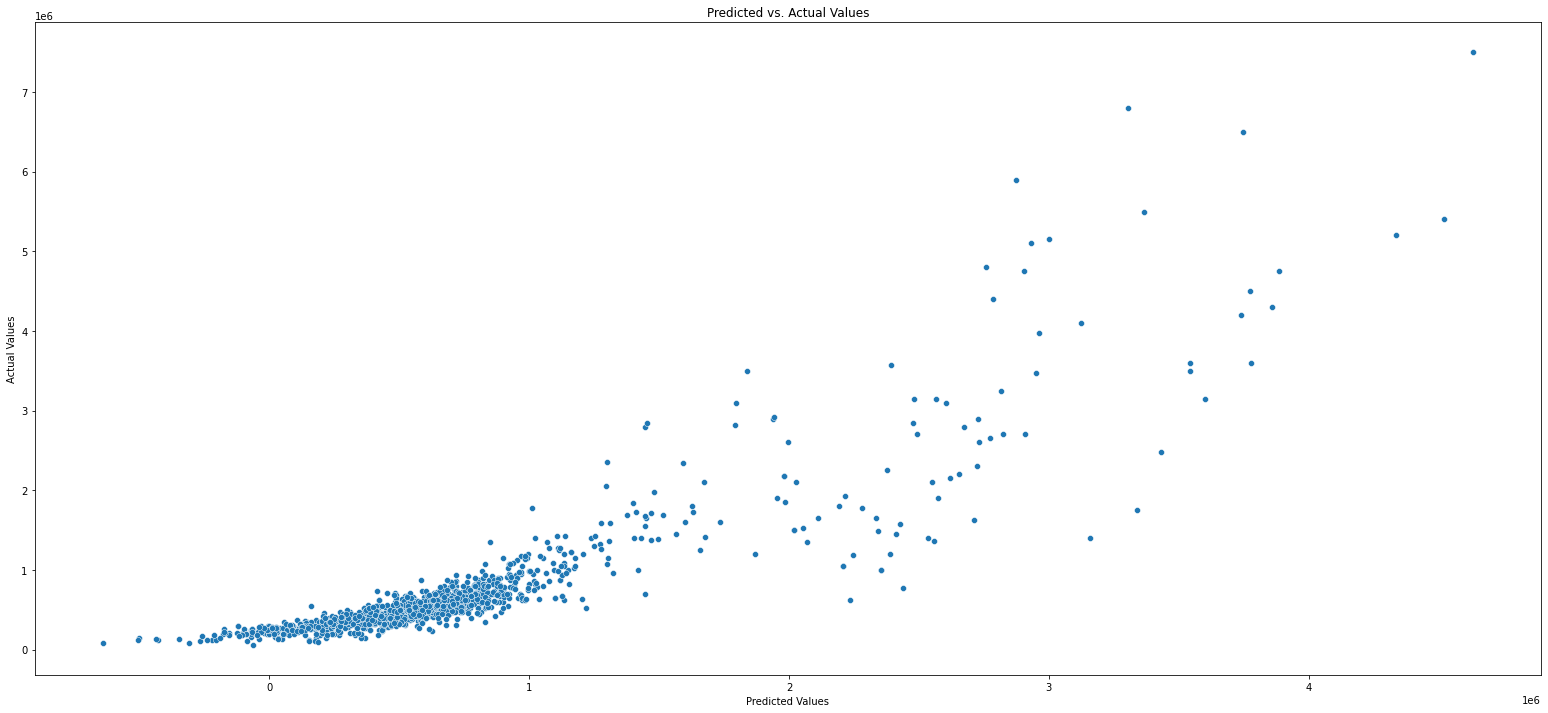

------------------------------------------------------------------------------------------------------------------------
Ridge()
R Squared (R2):  78.53290464518217
Mean Squared Error (MSE):  119979419836.5868
Root Mean Squared Error (RMSE):  346380.4553328418
Mean Absolute Error (MAE):  183970.27969762794


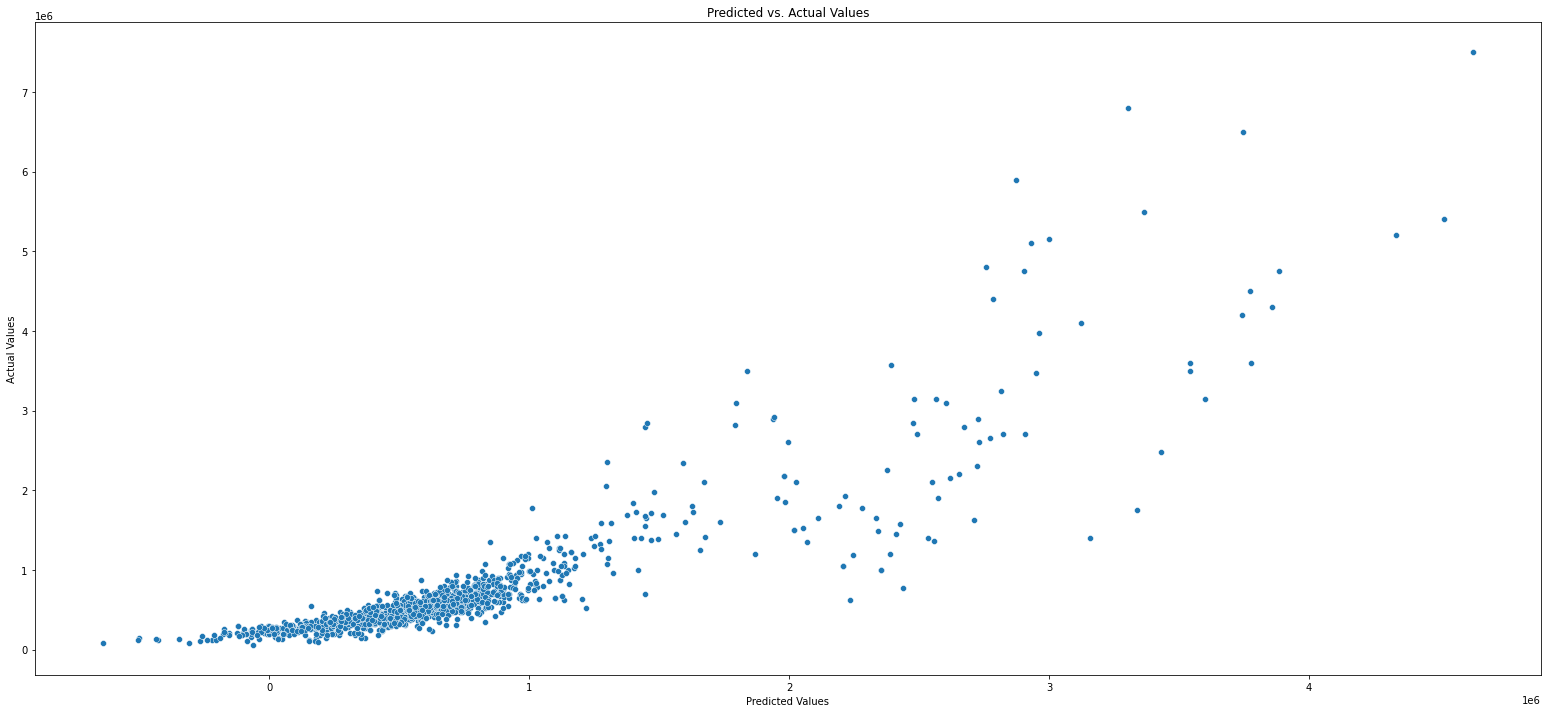

------------------------------------------------------------------------------------------------------------------------


In [51]:
from sklearn.model_selection import KFold
lr = LinearRegression()
rf=RandomForestRegressor()
kn=KNeighborsRegressor()
gb=GradientBoostingRegressor()
dt = DecisionTreeRegressor(max_features='auto')
ls=Lasso()
rd=Ridge()

model=[lr,rf,kn,gb,dt,ls,rd]
kf = KFold(n_splits=5, random_state=43, shuffle=True)

train=[]
test=[]
cv=[]

for m in model:
    m = m.fit(x_train,y_train)
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    train_score=r2_score(y_train,pred_train)
    train.append(train_score*100)
    test_score=r2_score(y_test,pred_test)
    test.append(test_score*100)
    print(m)
    print('R Squared (R2): ',test_score*100)
    print('Mean Squared Error (MSE): ',mean_squared_error(y_test,pred_test))
    print('Root Mean Squared Error (RMSE): ',np.sqrt(mean_squared_error(y_test, pred_test)))
    print('Mean Absolute Error (MAE): ',mean_absolute_error(y_test,pred_test))
    score=cross_val_score(m,X_scaled,Y,cv=kf)
    cv.append(score.mean()*100)
    plt.figure(figsize=[27,12])
    sns.scatterplot(x=pred_test, y=y_test)
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title('Predicted vs. Actual Values')
    plt.show()
    print('-'*120)
    
    
Overall_score={'Model':['LinearRegression','RandomForest','KNN','GradientBoosting','DecisionTree Regressor','Lasso','Ridge'],
             'Training Score':train,
            'Test Score':test,
            'Cross Validation Score': cv}
Overall_score=pd.DataFrame(data=Overall_score)

In [52]:
### Checking the overall score of the models now: 
Overall_score 

,Model,Training Score,Test Score,Cross Validation Score
0,LinearRegression,73.920704,78.533332,-5.604369e+24
1,RandomForest,98.810699,90.757644,8.927430e+01
2,KNN,83.486555,77.659273,7.487994e+01
3,GradientBoosting,93.402613,90.625272,8.799166e+01
4,DecisionTree Regressor,99.998558,86.184592,8.078903e+01
5,Lasso,73.920469,78.533833,7.334839e+01
6,Ridge,73.920467,78.532905,7.334862e+01


In [53]:
#Let's get a new column, that shows the difference between Prediction Test R2 Score and Cross Validation Score
Overall_score['Difference'] = Overall_score['Test Score'] - Overall_score['Cross Validation Score']
Overall_score #display the table

,Model,Training Score,Test Score,Cross Validation Score,Difference
0,LinearRegression,73.920704,78.533332,-5.604369e+24,5.604369e+24
1,RandomForest,98.810699,90.757644,8.927430e+01,1.483347e+00
2,KNN,83.486555,77.659273,7.487994e+01,2.779330e+00
3,GradientBoosting,93.402613,90.625272,8.799166e+01,2.633613e+00
4,DecisionTree Regressor,99.998558,86.184592,8.078903e+01,5.395565e+00
5,Lasso,73.920469,78.533833,7.334839e+01,5.185438e+00
6,Ridge,73.920467,78.532905,7.334862e+01,5.184286e+00


"Random Forest Regressor" model comes up with "high R2_score" and with least difference between the R2 Score and          the Cross validation score

### Hypertuning thr Random  Forest Regressor model now: 

In [54]:
param_grid = {'n_estimators':[50,100],
             'max_features':['auto','sqrt'],
             'max_depth':[4,5,None],'min_samples_split' : [2, 5, 10],
             'criterion':['squared_error','mse'],'min_samples_leaf': [1, 2, 3]}   

gridsearch=GridSearchCV(estimator = rf, param_grid = param_grid,cv=5)     

gridsearch.fit(x_train,y_train) 

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'mse'],
                         'max_depth': [4, 5, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100]})

In [55]:
print(gridsearch.best_score_, gridsearch.best_params_) 

0.8993860614302209 {'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


In [56]:
Rand_Final = RandomForestRegressor(n_estimators=100,max_features='auto',max_depth=None,criterion='mse',
                                   min_samples_split=2,min_samples_leaf=1)

Rand_Final.fit(x_train,y_train) 
predictions = Rand_Final.predict(x_test)  

In [57]:
print('R Squared (R2): ',r2_score(y_test,predictions))
print('Mean Squared Error (MSE): ',mean_squared_error(y_test,predictions))
print('Root Mean Squared Error (RMSE): ',np.sqrt(mean_squared_error(y_test, predictions)))
print('Mean Absolute Error (MAE): ',mean_absolute_error(y_test,predictions))

R Squared (R2):  0.9059930174380005
Mean Squared Error (MSE):  52540425436.94915
Root Mean Squared Error (RMSE):  229216.98330828184
Mean Absolute Error (MAE):  82922.62873898423


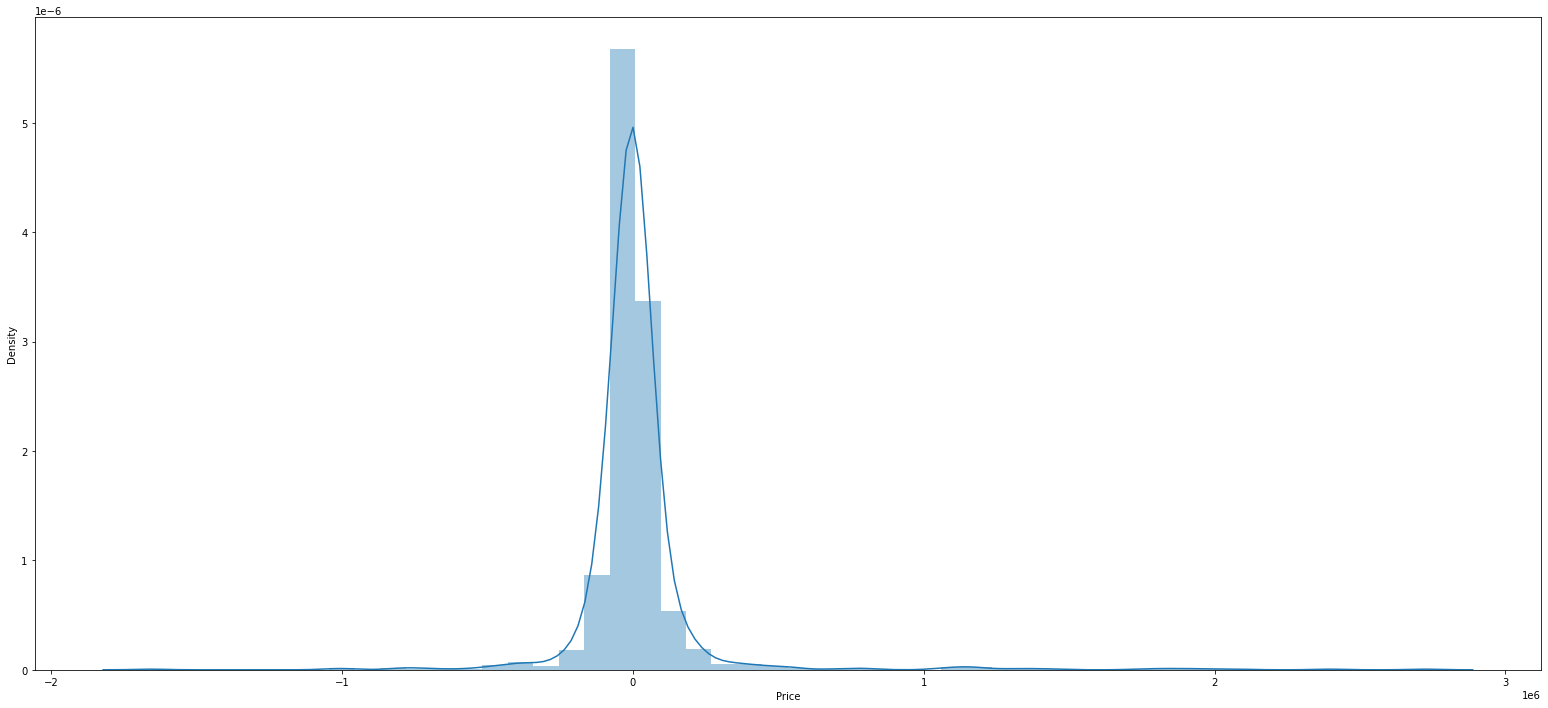

In [58]:
### Let's again plot the difference between the y_test price and our model predicted price
plt.figure(figsize=[27,12])
sns.distplot(y_test-predictions)
plt.show()

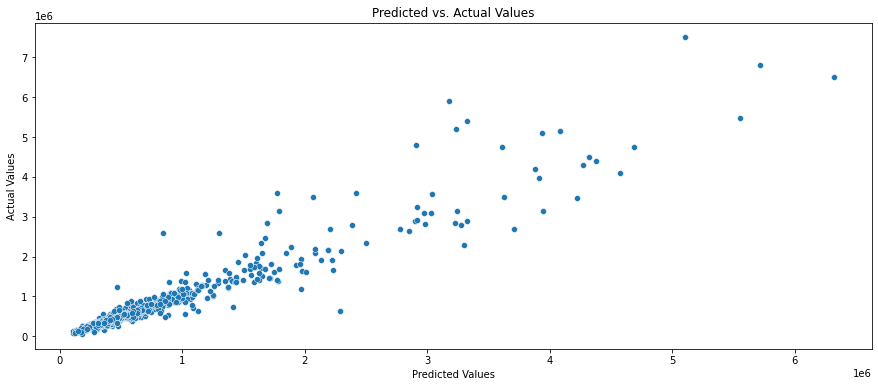

In [59]:
### Plot predicted vs. actual values
plt.figure(figsize=[15,6])
sns.scatterplot(x=predictions, y=y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Predicted vs. Actual Values')
plt.show()

Note: After hyper tuning , Our model score is now increased by 0.00133029998% of acuracy score. Hence, our model is ready with 90.83 % of Acuracy Score.

### Saving the model now: 

In [61]:
import joblib
joblib.dump(Rand_Final,'Used_Car_Price_Prediction.obj')

['Used_Car_Price_Prediction.obj']